In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
covid = pd.read_csv("covid.csv")

# Convert the 'date' column to a DateTime object
covid['date'] = pd.to_datetime(covid['date'])

# Replace missing values with zero
covid.fillna(0, inplace=True)


            new_cases  new_deaths
new_cases    1.000000    0.922825
new_deaths   0.922825    1.000000


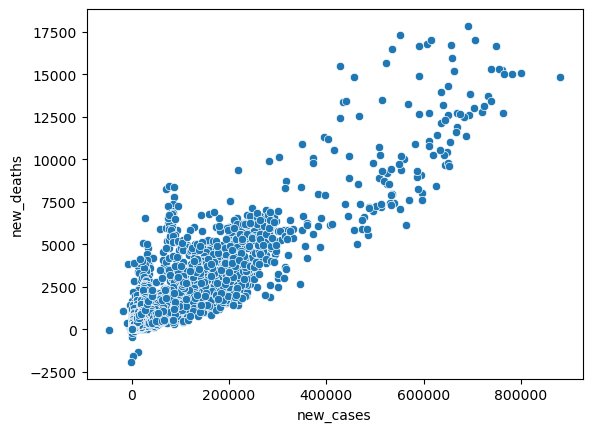

In [5]:
fig1 = sns.scatterplot(data = covid, x = 'new_cases', y = 'new_deaths')
fig1.set(xlabel='new_cases', ylabel='new_deaths')

correlation = covid[['new_cases','new_deaths']].corr()
print(correlation)

[Text(0.5, 0, 'date'),
 Text(0, 0.5, 'new cases & new deaths'),
 Text(0.5, 1.0, 'New Cases & New Deaths over time')]

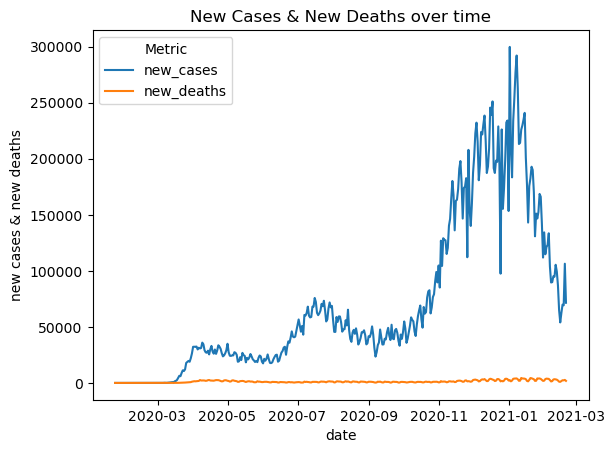

In [6]:
filtered_covid = covid[['date', 'location', 'new_deaths', 'new_cases']]

covid_US = filtered_covid[(filtered_covid['location'] == 'United States') & (filtered_covid['new_cases'] > 0)]

#.melt allows me to plot multiple variables on the figure
covid_US_melted = covid_US.melt(id_vars=['date'], value_vars=['new_cases', 'new_deaths'],
                                var_name='Metric', value_name='Count')

fig2 = sns.lineplot(data=covid_US_melted, x='date', y='Count', hue='Metric')
fig2.set(xlabel='date', ylabel='new cases & new deaths', title='New Cases & New Deaths over time')

/var/folders/hc/zwth2m5x79q31wxczlmqc4400000gn/T/ipykernel_6318/2721186491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_US['mortality_rate'] = covid_US['new_deaths'] / covid_US['new_cases']
/var/folders/hc/zwth2m5x79q31wxczlmqc4400000gn/T/ipykernel_6318/2721186491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_US.fillna(0, inplace=True)


[Text(0.5, 0, 'date'), None, Text(0.5, 1.0, 'Mortality Rate over time')]

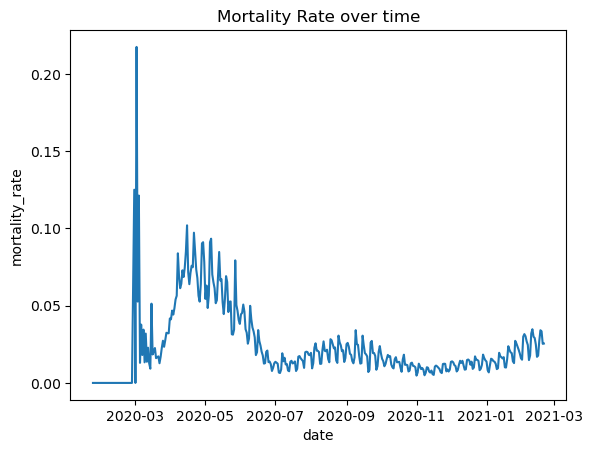

In [45]:
covid_US['mortality_rate'] = covid_US['new_deaths'] / covid_US['new_cases']
covid_US.fillna(0, inplace=True)

fig3 = sns.lineplot(data=covid_US, x='date', y='mortality_rate')
fig3.set(xlabel='date', label='mortality rate', title='Mortality Rate over time')

In [7]:
date_cases_loc=covid[['date','new_cases','location']]

filtered_dcl=date_cases_loc[(date_cases_loc['date']>'2020-05-25') & (date_cases_loc['date']<'2020-06-03')]

filtered_dcl = filtered_dcl.sort_values(by='new_cases', ascending=False)

print(filtered_dcl)

            date  new_cases       location
68964 2020-05-30   136515.0          World
68967 2020-06-02   121965.0          World
68963 2020-05-29   120902.0          World
68962 2020-05-28   119283.0          World
68965 2020-05-31   106408.0          World
...          ...        ...            ...
26736 2020-05-28        0.0  Guinea-Bissau
26738 2020-05-30        0.0  Guinea-Bissau
26739 2020-05-31        0.0  Guinea-Bissau
34757 2020-06-02        0.0           Laos
23143 2020-06-02     -647.0         France

[1553 rows x 3 columns]


In [8]:
filtered_dcl = filtered_dcl[(filtered_dcl['location']=='United States') | (filtered_dcl['location']=='Russia')]
print(filtered_dcl)

            date  new_cases       location
66685 2020-05-29    24472.0  United States
66686 2020-05-30    23633.0  United States
66684 2020-05-28    22322.0  United States
66689 2020-06-02    21503.0  United States
66682 2020-05-26    19650.0  United States
66687 2020-05-31    18987.0  United States
66683 2020-05-27    18549.0  United States
66688 2020-06-01    17435.0  United States
52061 2020-05-31     9268.0         Russia
52060 2020-05-30     8952.0         Russia
52056 2020-05-26     8915.0         Russia
52063 2020-06-02     8858.0         Russia
52059 2020-05-29     8572.0         Russia
52062 2020-06-01     8485.0         Russia
52058 2020-05-28     8371.0         Russia
52057 2020-05-27     8338.0         Russia


In [9]:
covid_grouped=covid.groupby('location')

max_new=covid_grouped['new_cases'].max()

max_new_sorted=max_new.sort_values(ascending=False)

print(max_new_sorted)


location
World                       879905.0
Europe                      346447.0
North America               324225.0
United States               299786.0
European Union              274748.0
                              ...   
Faeroe Islands                   0.0
Turks and Caicos Islands         0.0
Saint Helena                     0.0
Cayman Islands                   0.0
Jersey                           0.0
Name: new_cases, Length: 213, dtype: float64


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Average New Cases'),
 Text(0.5, 1.0, 'Line Plot of Average New Cases over Time')]

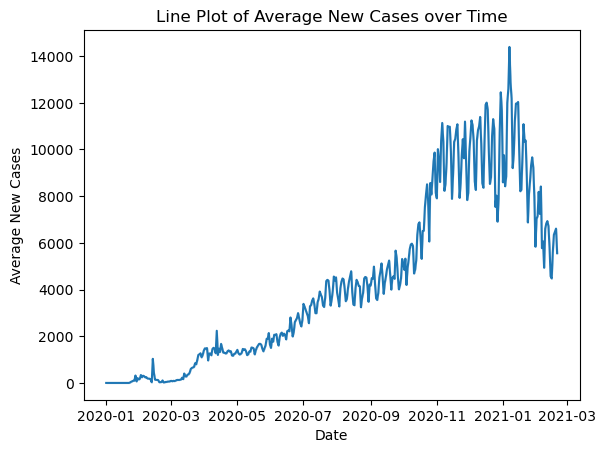

In [46]:
fig5 = sns.lineplot(data=covid, x='date', y='avg_new')
fig5.set(xlabel='Date', ylabel='Average New Cases', title='Line Plot of Average New Cases over Time')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Average New Cases'),
 Text(0.5, 1.0, 'Regplot of Average New Cases over Time')]

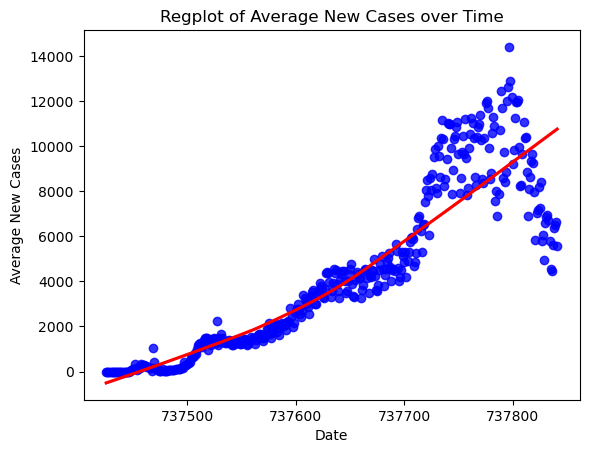

In [44]:
covid['date'] = pd.to_datetime(covid['date'])

# Group by date and compute the mean of new cases
covid_grouped_date = covid.groupby('date')['new_cases'].mean().reset_index()
covid_grouped_date.rename(columns={'new_cases': 'avg_new'}, inplace=True)

# Convert date to ordinal format for plotting
covid_grouped_date['date_ordinal'] = covid_grouped_date['date'].map(pd.Timestamp.toordinal)

fig4 = sns.regplot(data=covid_grouped_date, x='date_ordinal', y='avg_new', lowess=True, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

fig4.set(xlabel='Date', ylabel='Average New Cases', title='Regplot of Average New Cases over Time')